In [11]:
import os #to manipulate file paths 

import numpy as np # facilitate advanced mathematical and other types of operations on large numbers of data


import pandas as pd # data processing ie allows importing data from various file format sand data analysis

for dirname, _, filenames in os.walk('../input/covid19-in-india/covid_19_india.csv'): #obtains the folder/directory name and 

    for filename in filenames:     #filenames and then loops through each filename to attach to single path/directory
        print(os.path.join(dirname, filename)) # combines one or more path names into a single path

    
    

In [12]:

import matplotlib.pyplot as plt        #visualization library in Python

%matplotlib inline                    
# lead to static images of your plot embedded in the notebook.

import seaborn as sns      #built on top of matplotlib, provides beautiful default styles and 
                           # colour palettes to make statistical plots more attractive
import plotly      #python library which is used to design graphs, especially interactive graphs It can plot various types of graphs  
                   #  and charts like scatter plots, line charts, bar charts, box plots, histograms, pie charts.         



import plotly.express as px  # it does a lot of the things that you can do it with Plotly but with a much simpler syntax.

import plotly.graph_objects as go

import cufflinks as cf   #binds the power of Plotly with the flexibility of Pandas for easy plotting

import plotly.offline as pyo  #Plotly Offline allows you to create graphs offline and save them locally.

from plotly.offline import init_notebook_mode,plot,iplot

import folium             #Folium is a Python library used for visualizing geospatial data(basically used to plot interactive maps).

from folium import plugins

plt.rcParams['figure.figsize'] = 10, 12

import warnings

warnings.filterwarnings('ignore')  # To ignore the warnings raised

In [13]:
pyo.init_notebook_mode(connected=True) #to display the plot inside the notebook, we need to initiate plotly’s notebook mode 
cf.go_offline()  #making the plots offline

In [14]:
df= pd.read_csv(r"../input/covid19-in-india/covid_19_india.csv")  #entering the dataset's path
df.head()    #displays number all the column headers

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [15]:
df.isnull().sum()   # Returns the number of missing values in the data set.

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [16]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True) #Restricts the desired columns from being considering in this notebook

In [17]:
df.shape   # displays number of rows and columns 

(18110, 7)

In [18]:
df.head()  #checking whether the desired columns are restricted or not

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3


# Recovered cases and Deaths

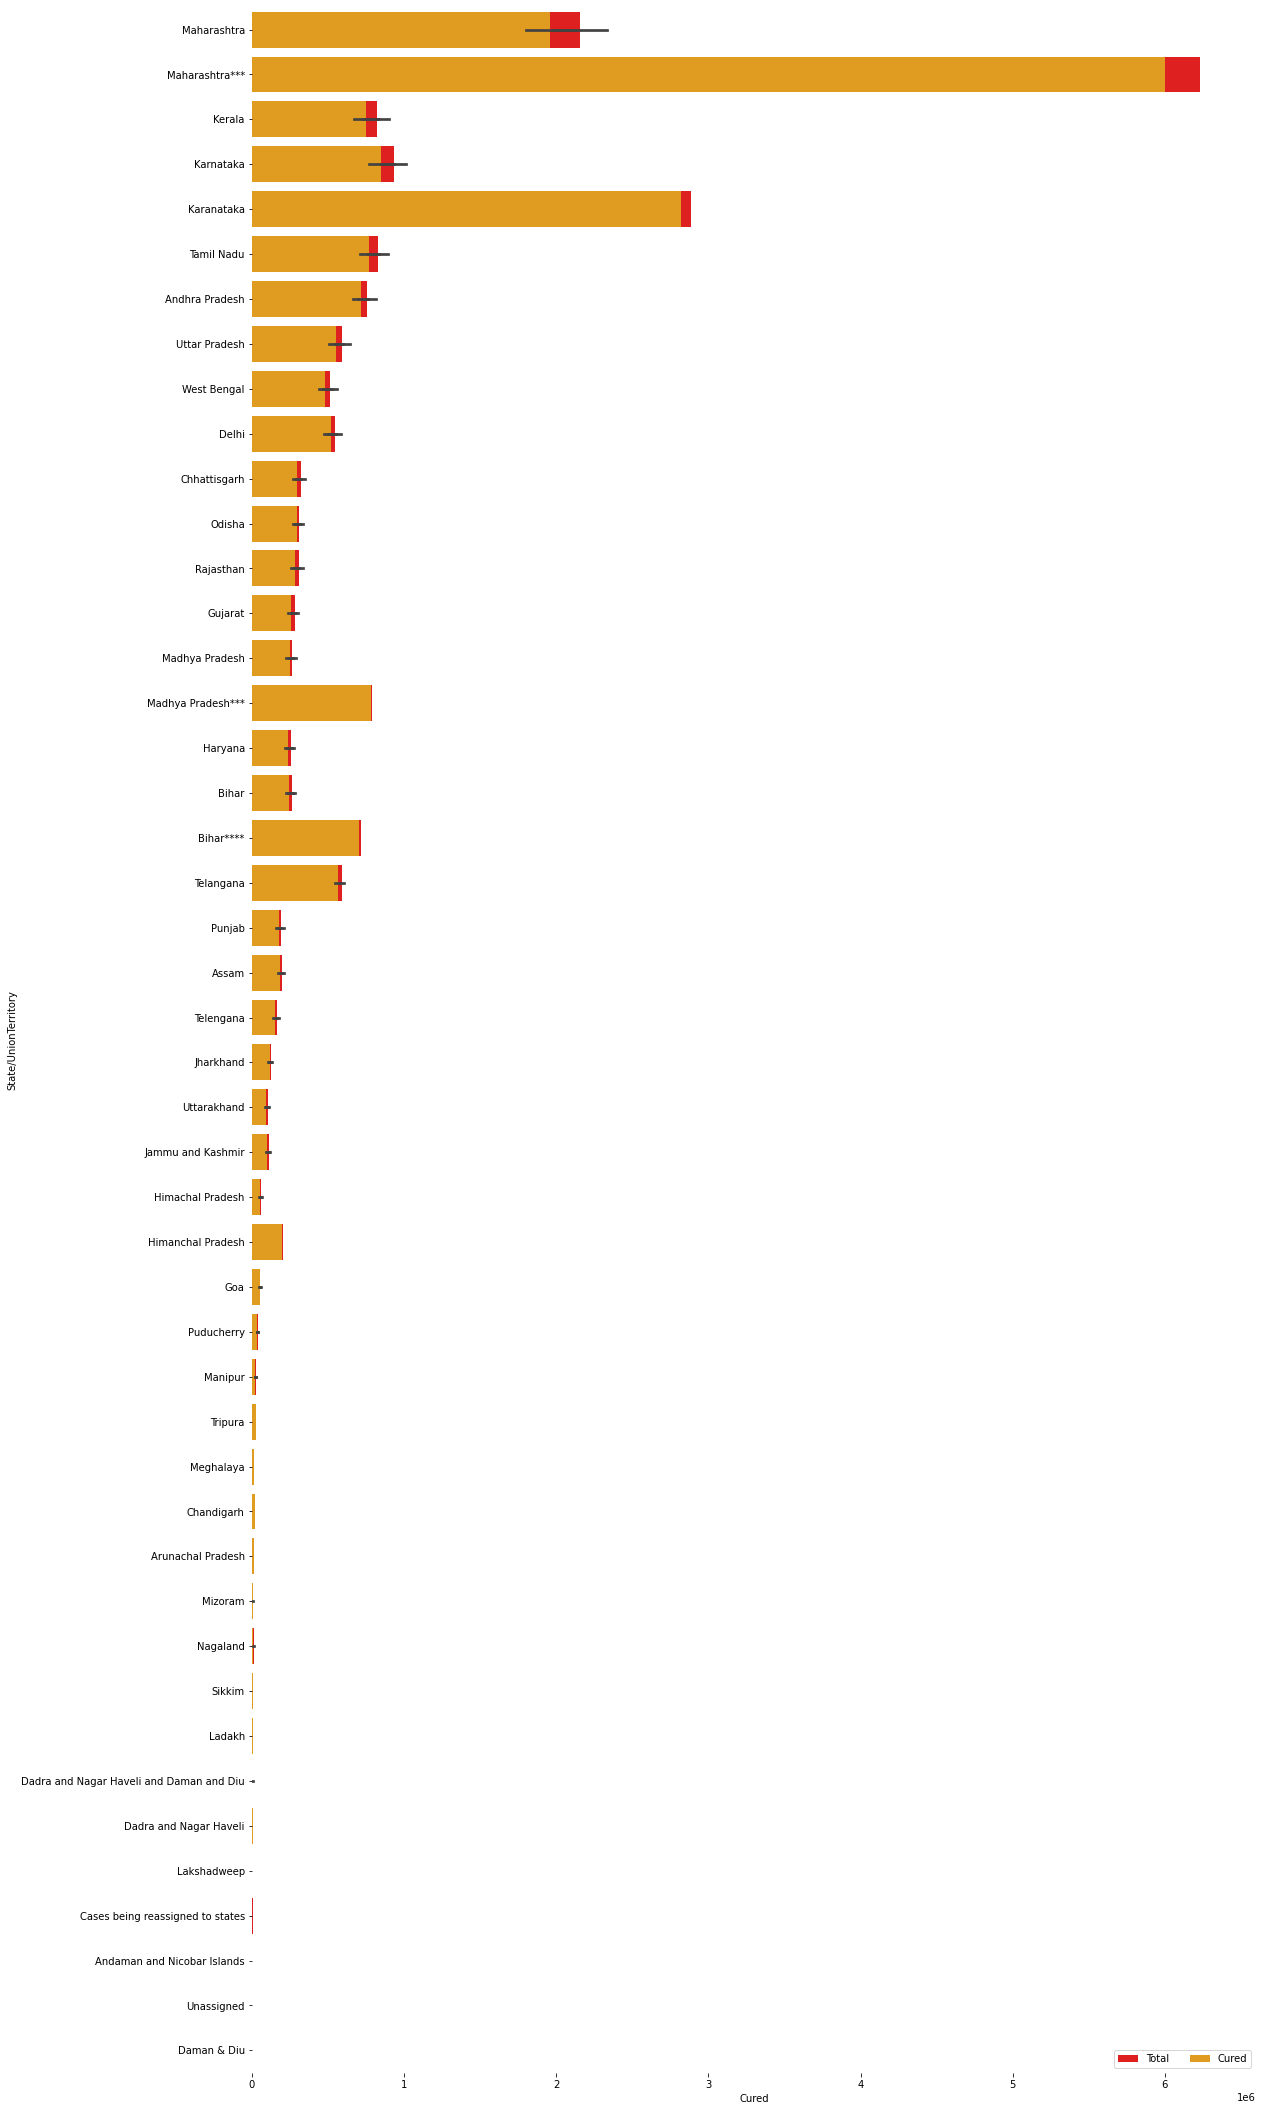

In [19]:
f, ax = plt.subplots(figsize=(18, 38))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]   #data requiered to plot the graph
data.sort_values('Confirmed',ascending=False,inplace=True)   #arranging values of column 'confirmed' in descending order
 
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red") 
     
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="orange") 

ax.legend(ncol=2, loc="lower right", frameon=True)   #location of legend to be printed
ax.set(xlim=(0, 6600000))  #maximum limit for x axis values
sns.despine(left=True, bottom=True)

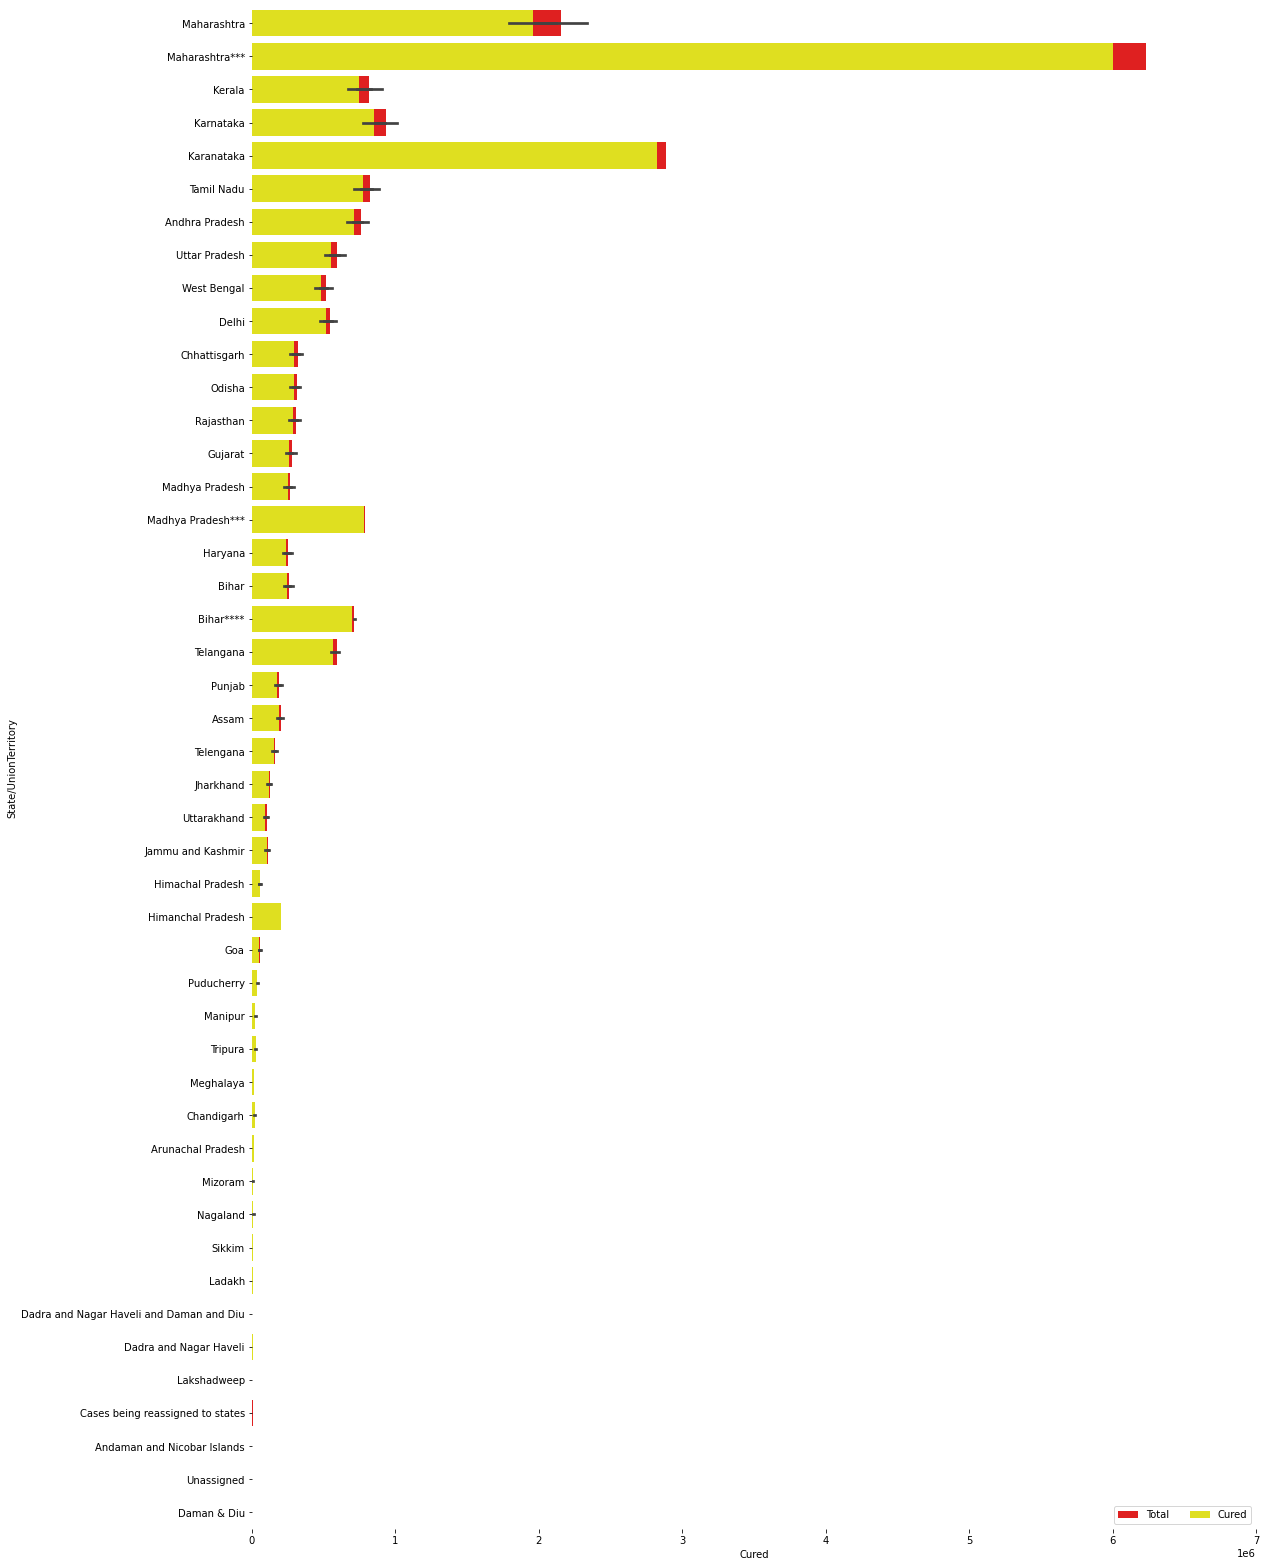

In [20]:
f, ax = plt.subplots(figsize=(18, 28))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
 
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
 
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="yellow")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000000))
sns.despine(left=True, bottom=True)

##Confirmed cases, Recovered cases and DeathsTrolls in India 

In [21]:
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()   #pandas package is used to group here

#creates a column sorted based on the 'Date' and the repeating elements are summed together to make it as a single value using '.sum() then the index is reset uisng '.reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [22]:
print("The Confirmed Cases are",df_confirmed_india.Confirmed.max())
print("The Recovered Cases are",df_cured_india.Cured.max())
print("The Deaths Cases are",df_death_india.Deaths.max())

The Confirmed Cases are 32036511
The Recovered Cases are 31220981
The Deaths Cases are 429179


## Day-wise cases in India

> ## Day-wise Cases been confirmed

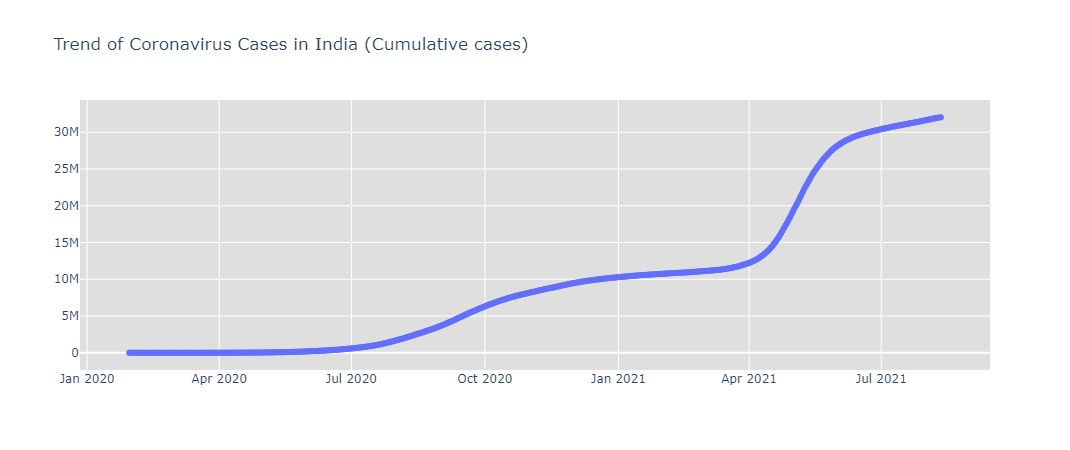

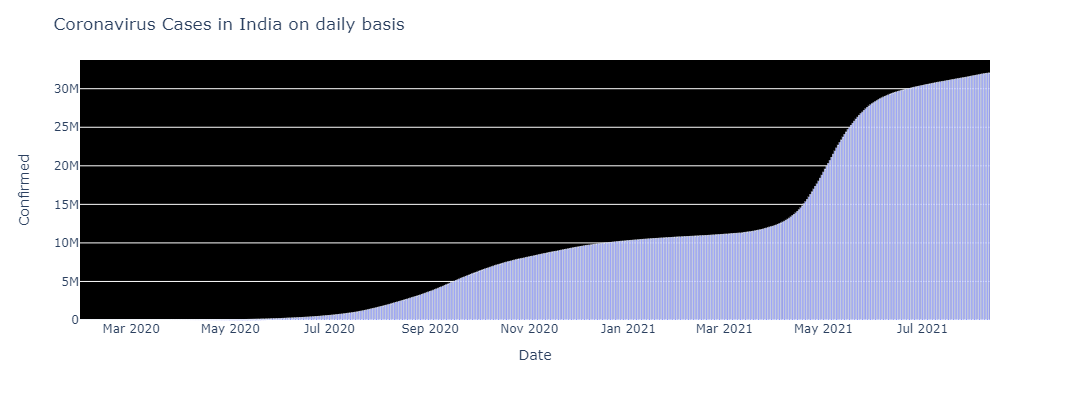

In [23]:
 fig = go.Figure()
#every figure produced with the plotly library actually uses graph objects under the hood certain kinds of figures are not 
#yet possible to create with Plotly Express, such as figures that use certain 3D trace-types like mesh or isosurface
    
    #plot using graph objects
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y = df_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(223, 223, 223)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
#plot using plotly express
fig = px.bar(df_confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)  
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='black')
fig.show()

#Death cases day-wise

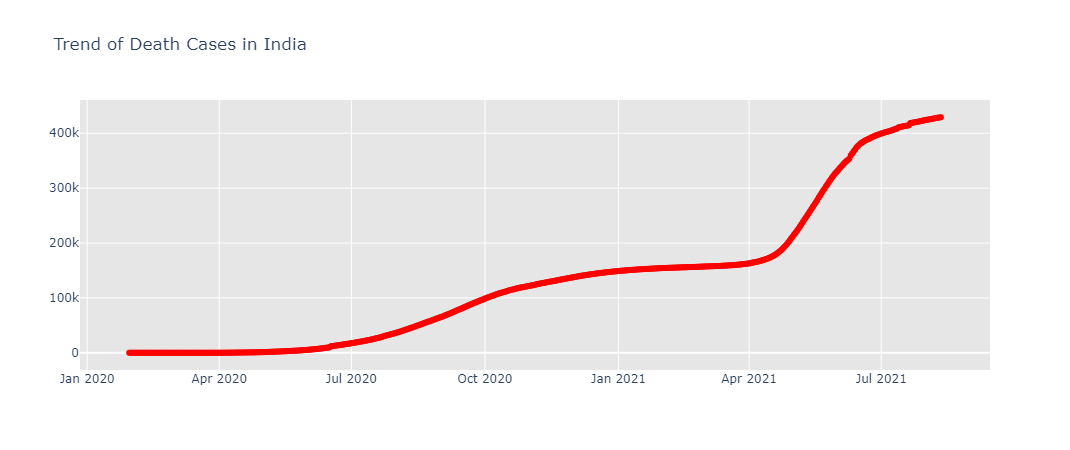

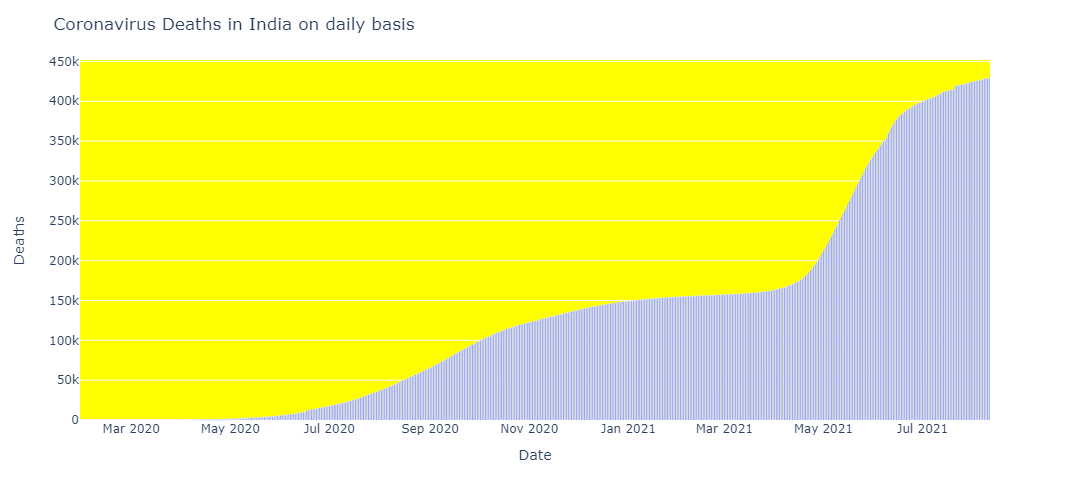

In [24]:
fig = go.Figure()
 #plot is using plotly.graph_objects.
fig.add_trace(go.Scatter(x=df_death_india['Date'], y = df_death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_death_india, x="Date", y="Deaths", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='yellow')
fig.show()

#Day-Wise Confirmed, Deaths and Cured cases

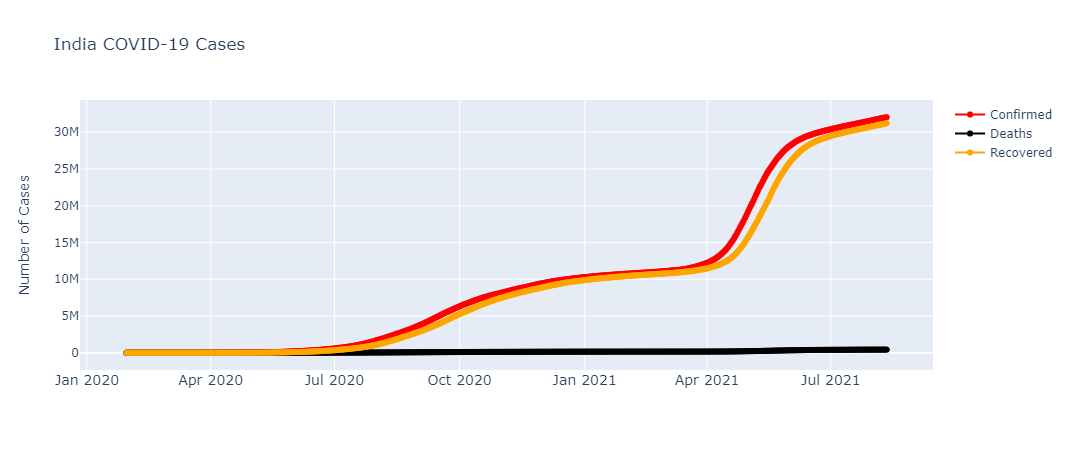

In [25]:
# multiple plots in a single figure using graph objects

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y=df_confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=df_death_india['Date'], y=df_death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=df_cured_india['Date'], y=df_cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='orange', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

#Analyzing State-Wise Cases and Recovery

In [26]:
import numpy as np
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#creating new columns.

state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+ state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [27]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,7548,129,7412,7,1.71,98.20
1,Andhra Pradesh,1985182,13564,1952736,18882,0.68,98.37
2,Arunachal Pradesh,50605,248,47821,2536,0.49,94.50
3,Assam,576149,5420,559684,11045,0.94,97.14
4,Bihar,725279,9646,715352,281,1.33,98.63


In [28]:
state_cases['State/UnionTerritory'].unique()  #returns a sorted array.

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karanataka', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Madhya Pradesh***', 'Maharashtra',
       'Maharashtra***', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [29]:
state_cases['State/UnionTerritory'].nunique()  #returns number of unique elements

46

#data of about 40 States and Union Territories are obtained.

#Analyzing the Confirmed,Recovered and Deaths on Each State

In [30]:
# Displaying all the columns/data stored in 'state_cases' based on the descending order of data in the column 'confirmed'
#specifying colours for each
state_wise_cases=state_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='plasma',subset=["Confirmed"])\
                        .background_gradient(cmap='hsv',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='cividis',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

#Displaying state-wise cases

In [31]:
state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
27,Maharashtra,6363442,134201,6159676,69565,2.110000,96.800000
28,Maharashtra***,6229596,130753,6000911,97932,2.100000,96.330000
22,Kerala,3586693,18004,3396184,172505,0.500000,94.690000
21,Karnataka,2921049,36848,2861499,22702,1.260000,97.960000
20,Karanataka,2885238,36197,2821491,27550,1.250000,97.790000
38,Tamil Nadu,2579130,34367,2524400,20363,1.330000,97.880000
1,Andhra Pradesh,1985182,13564,1952736,18882,0.680000,98.370000
43,Uttar Pradesh,1708812,22775,1685492,545,1.330000,98.640000
45,West Bengal,1534999,18252,1506532,10215,1.190000,98.150000
12,Delhi,1436852,25068,1411280,504,1.740000,98.220000


#Inference:Maharastra is at the top of confirmed cases

#Checking the casualty Ratio

In [32]:
df['Fatality-Ratio'] = df['Deaths']/df['Confirmed']  #one more column of data is created called 'Fatalility-Ratio'
df['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
18105    0.005891
18106    0.009583
18107    0.021515
18108    0.013328
18109    0.011891
Name: Fatality-Ratio, Length: 18110, dtype: float64

#Casualty_ratio_among states

,State/UnionTerritory,Fatality-Ratio
0,Andaman and Nicobar Islands,5.173971
1,Andhra Pradesh,4.948524
2,Arunachal Pradesh,1.372714
3,Assam,3.331032
4,Bihar,5.992220
5,Bihar****,0.026390
6,Cases being reassigned to states,0.000000
7,Chandigarh,6.604134
8,Chhattisgarh,4.607076
9,Dadra and Nagar Haveli,0.000772


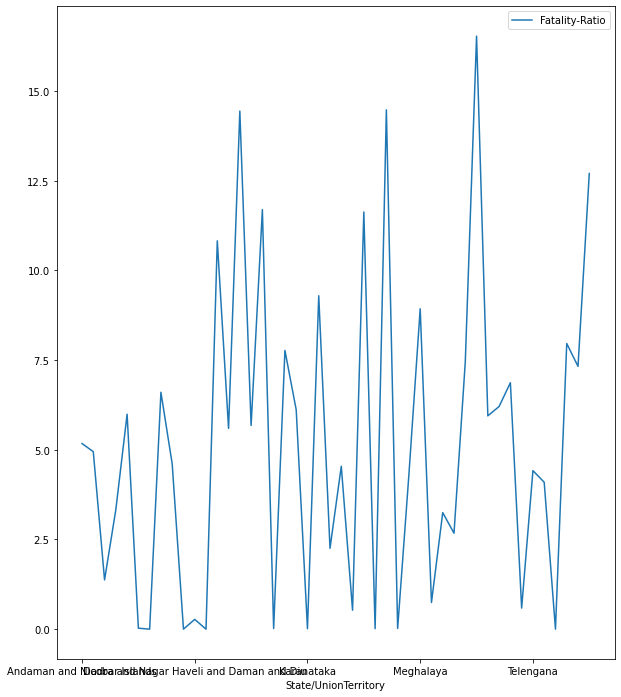

In [33]:
fatality_ratio=df.groupby('State/UnionTerritory')['Fatality-Ratio'].sum().reset_index()  #sorting values of the new column based on the 'State/UnionTerritory'
fatality_ratio.plot('State/UnionTerritory','Fatality-Ratio')     
fatality_ratio

## Top 10 States with highest number of Deaths

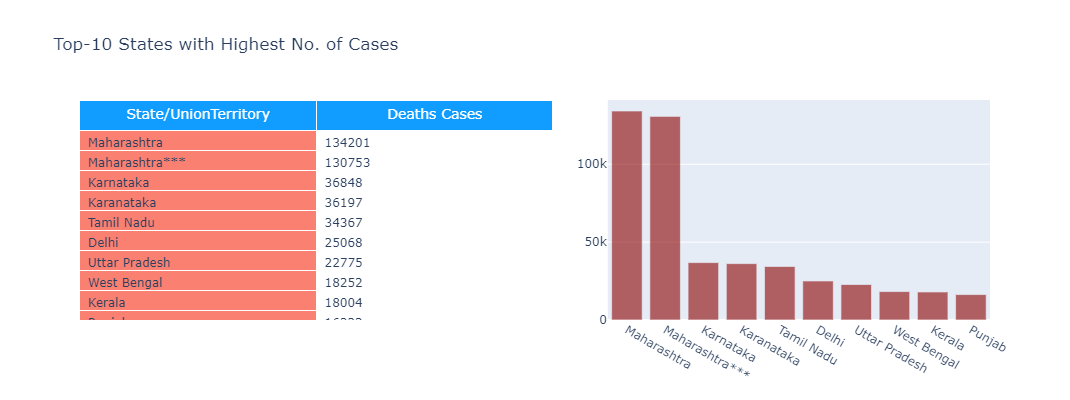

In [34]:
# Top 10 states with maximum number of Deaths

#pandas package is used to group here

top_10=state_cases.groupby('State/UnionTerritory')['Deaths'].sum().sort_values(ascending=False).reset_index()

 #plot using plotly_graph objects
    
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State/UnionTerritory","Deaths Cases"],  # Headings and its styles are declared.
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State/UnionTerritory'].head(10),top_10['Deaths'].head(10)],  # contents inside the cells are declared.
               fill = dict(color = ['salmon', 'white']),
               align = ['left'],height=20))

trace1 = go.Bar(x=top_10['State/UnionTerritory'].head(10),
                y=top_10['Deaths'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='darkred'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.1f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

## Testing Details

In [35]:
df_testing=pd.read_csv(r"../input/covid19-in-india/StatewiseTestingDetails.csv")  # Entering a new set of data. 
df_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [36]:
# States with Total Sample collections

#pandas package is used to group here

df_sample=df_testing.groupby('State')['TotalSamples'].sum().sort_values(ascending=False).reset_index() #sorting is done in descending order.
df_sample.head()

,State,TotalSamples
0,Uttar Pradesh,1.138818e+10
1,Bihar,7.392796e+09
2,Maharashtra,7.334574e+09
3,Karnataka,6.773248e+09
4,Tamil Nadu,6.711189e+09


#positive cases rising in India

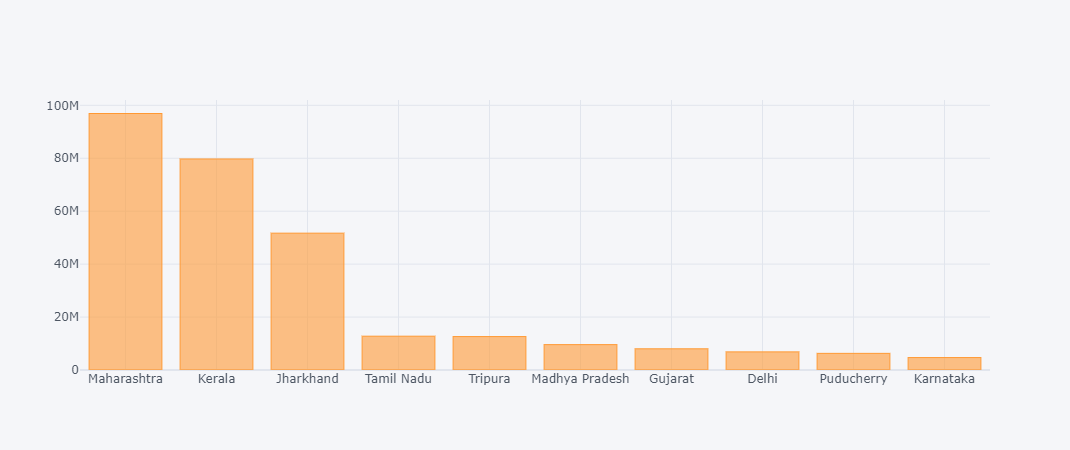

<AxesSubplot:xlabel='State'>

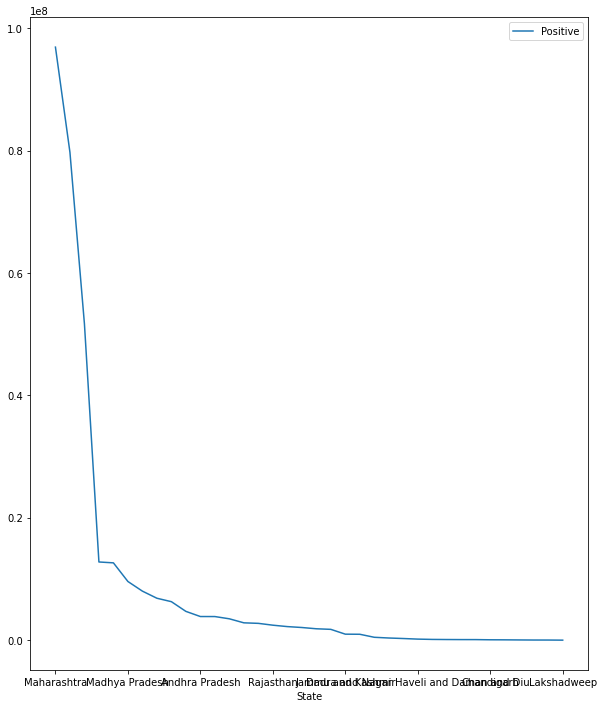

In [37]:
#pandas package is used to group here

df_positive=df_testing.groupby('State')['Positive'].sum().sort_values(ascending=False).reset_index()  
df_positive.head(10).iplot(kind='bar',x='State',y='Positive')

df_positive.plot('State','Positive')

#Vaccination analysis

In [38]:
df_vaccine=pd.read_csv(r'../input/covidd-vaccine-statewisecsv/covid_vaccine_statewise.csv')
df_vaccine.head()


,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


##Vaccination data interms of pie chart as per gender

 



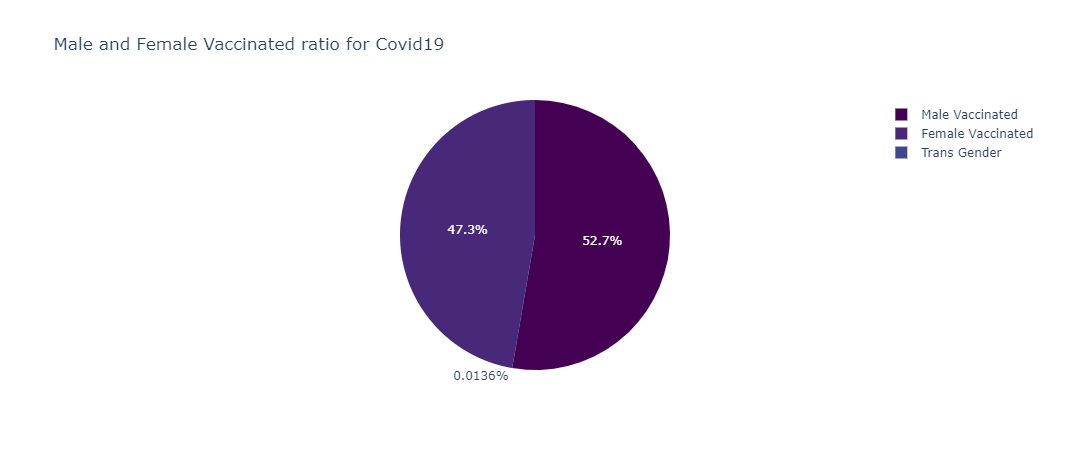

In [39]:
 #plot is using plotly.express
    
male = df_vaccine["Male(Individuals Vaccinated)"].sum() # Sum of all the values in the desired column is found to represent it in pie chart format.
female = df_vaccine["Female(Individuals Vaccinated)"].sum()  
trans = df_vaccine["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19", color_discrete_sequence=px.colors.sequential.Viridis)


#covishield vs cowaxin

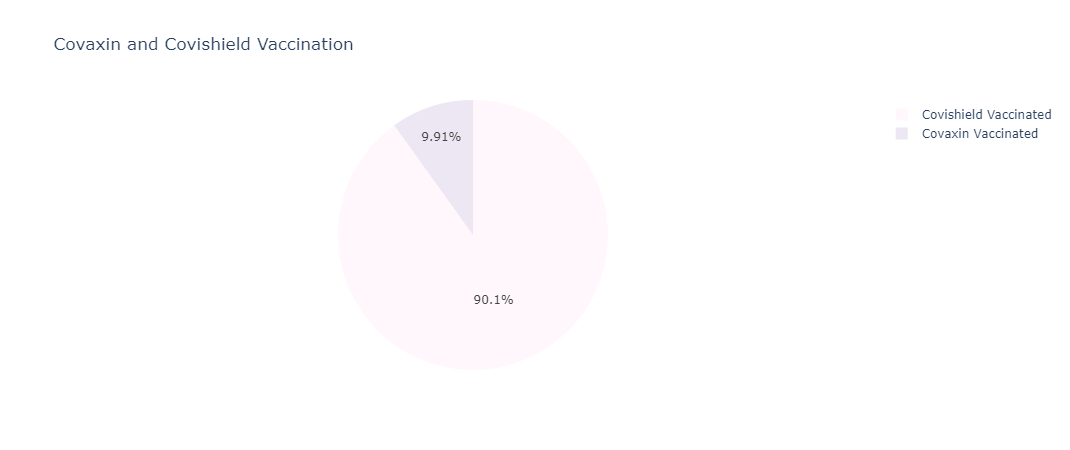

In [40]:
Covaxin = df_vaccine["Total Covaxin Administered"].sum() 
Covishield = df_vaccine["Total CoviShield Administered"].sum()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination",color_discrete_sequence=px.colors.sequential.PuBu)

#Doses administered vs people being vacccinated.

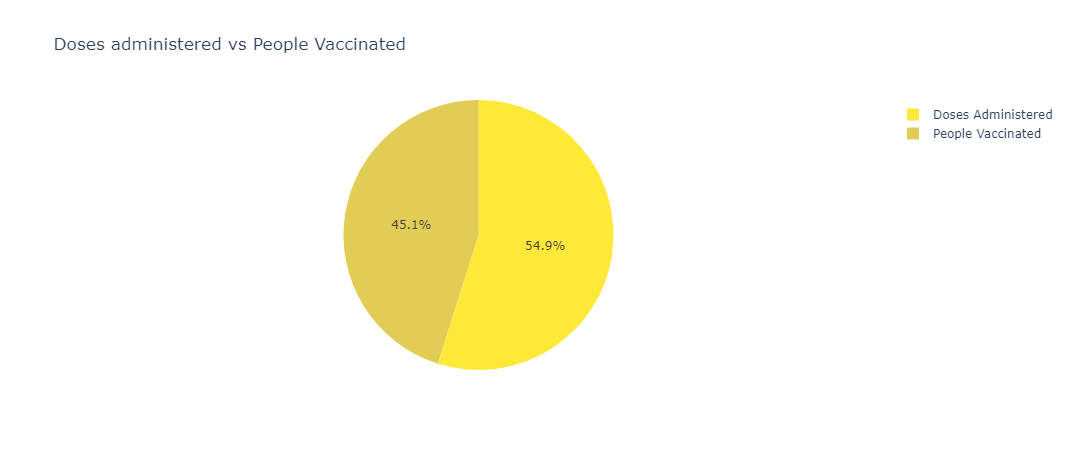

In [41]:
Doses = df_vaccine["Total Doses Administered"].sum() 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated",color_discrete_sequence=px.colors.sequential.Cividis_r)

#Analysis Karnataka of karnataka interms of number of people being vaccinated.

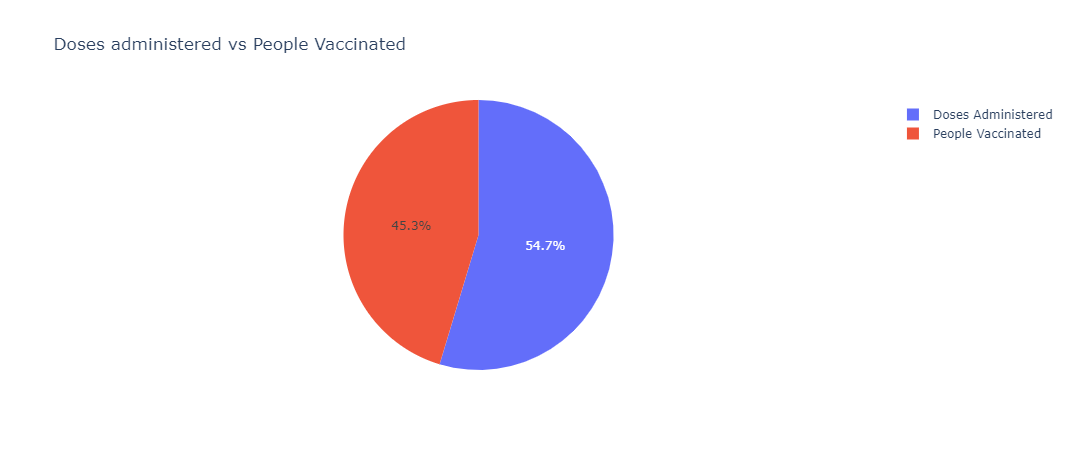

In [42]:
df_Karnataka=df_vaccine[df_vaccine['State']=='Karnataka']
Doses = df_Karnataka["Total Doses Administered"].sum() 
Vaccinated = df_Karnataka["Total Individuals Vaccinated"].sum()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

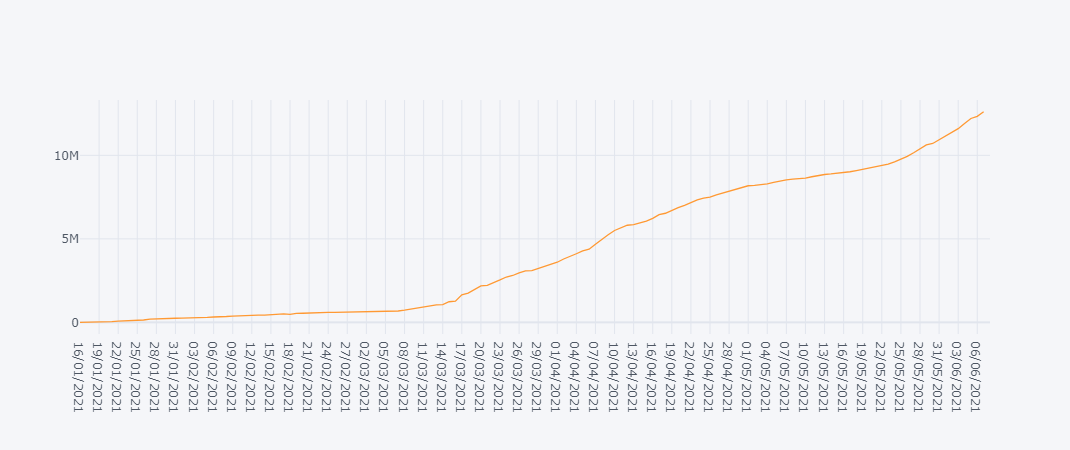

In [43]:
df_Karnataka.iplot(kind='scatter',x='Updated On',y='Total Individuals Vaccinated')

#Threat Prediction(Upcoming cases vs Deaths)

#1.Predicting upcoming cases:

In [44]:
#df_confirmed_india contains values of the cases confirmed sorted previously as per date. 
df_confirmed_india.columns = ['ds','y']
 # To convert string Date time into Python Date time object.
#Datetime module supplies classes to work with date and time. These classes provide a number of functions to deal with dates, times and time intervals.
df_confirmed_india['ds'] = pd.to_datetime(df_confirmed_india['ds'])
 

In [45]:
from fbprophet import Prophet 
#Prophet is a forecasting procedure implemented in R and Python

m = Prophet()
m.fit(df_confirmed_india)  #fitting the model for our data input

#The make_future_dataframe function lets you specify the frequency and number of periods 
#you would like to forecast into the future. By default, the frequency is set to days
future = m.make_future_dataframe(periods=365) #forecasting 365 days into future

 

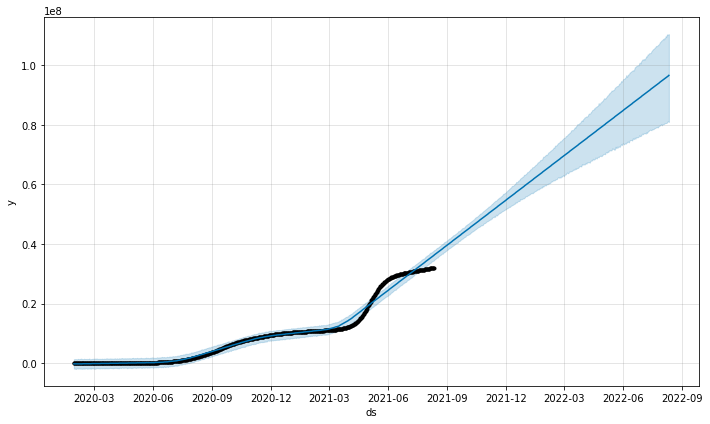

In [46]:
forecast = m.predict(future)
confirmed_model_plot=m.plot(forecast)  #its assigned to prevent a copy of the same waveform being printed.


#black line indicates the time/years covered till now.
#the beam shows the region within which the case's plot may fall

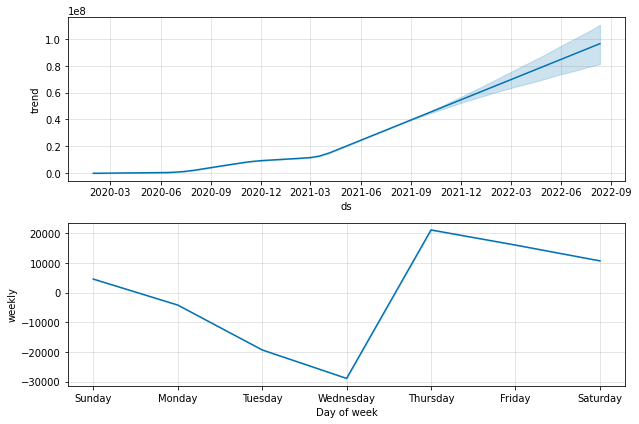

In [47]:
confirmed_forecast_plot =m.plot_components(forecast)  #its assigned to prevent a copy of the same waveform being printed.

2.Predicting possible deaths:

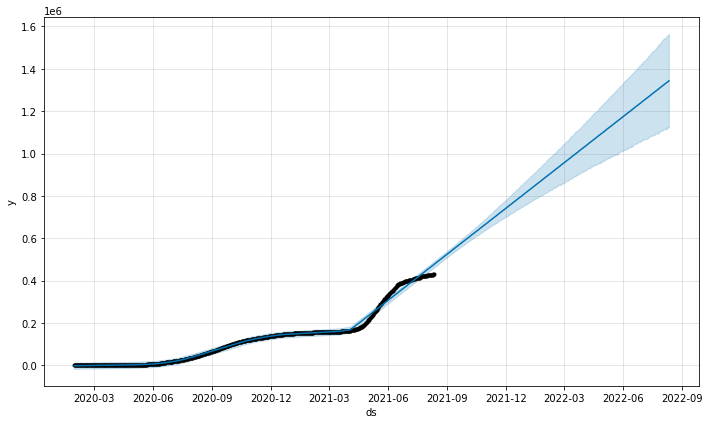

In [48]:
df_death_india.columns = ['ds','y']
df_death_india['ds'] = pd.to_datetime(df_death_india['ds'])
model = Prophet()
model.fit(df_death_india)
future = model.make_future_dataframe(periods=365)
prediction = model.predict(future)
death_model_plot=model.plot(prediction)
 

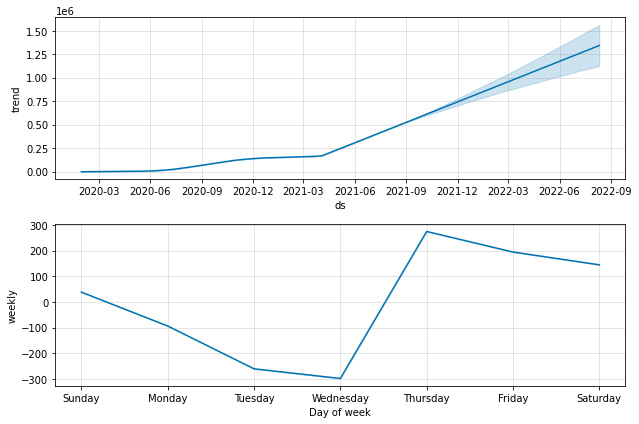

In [49]:
death_forecast_plot=model.plot_components(prediction)   